In [76]:
import pandas as pd

In [79]:
! wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet

--2024-05-20 13:38:02--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.160.37.133, 18.160.37.215, 18.160.37.115, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.160.37.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47673370 (45M) [application/x-www-form-urlencoded]
Saving to: ‘yellow_tripdata_2023-01.parquet’

yellow_tripdata_202 100%[===================>]  45.46M   169MB/s    in 0.3s    

2024-05-20 13:38:03 (169 MB/s) - ‘yellow_tripdata_2023-01.parquet’ saved [47673370/47673370]



In [80]:
df=pd.read_parquet('./data/yellow_tripdata_2023-01.parquet')

In [81]:
print(len(df.columns))

19


In [83]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [89]:
df['duration']=df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [90]:
df.duration =df.duration.apply(lambda td:td.total_seconds()/60)

In [91]:
df.duration.describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [ ]:
###########Q3. Dropping outliers
# Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

# What fraction of the records left after you dropped the outliers?

# 90%
# 92%
# 95%
# 98%

In [95]:
newdf=df[(df.duration>=1) & (df.duration<=60)]

In [96]:
left=len(newdf)/len(df)

In [97]:
left

0.9812202822125979

In [98]:
features=['PULocationID','DOLocationID']

In [99]:
df['PULocationID'] = df['PULocationID'].astype(str)
df['DOLocationID'] = df['DOLocationID'].astype(str)


In [101]:
from sklearn.feature_extraction import DictVectorizer

In [100]:
train_dicts =df[features].to_dict(orient='records')

In [103]:
dv=DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [104]:
X_train

<3066766x518 sparse matrix of type '<class 'numpy.float64'>'
	with 6133532 stored elements in Compressed Sparse Row format>

In [106]:
print(len(dv.feature_names_))

518


In [107]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [108]:
lr=LinearRegression()

In [111]:
target='duration'
y_train=df[target].values

In [117]:
lr.fit(X_train,y_train)

LinearRegression()

In [120]:
y_pred =lr.predict(X_train)

In [121]:
from sklearn.metrics import mean_squared_error

In [123]:
mean_squared_error(y_train,y_pred,squared=False)

41.99649230707697

In [6]:
df['duration']=df.lpep_dropoff_datetime-df.lpep_pickup_datetime

In [10]:
print(df['duration'].iloc[0].total_seconds()/60)

11.016666666666667


In [12]:
df.duration =df.duration.apply(lambda td:td.total_seconds()/60)

In [13]:
df = df[df.trip_type==2]

In [15]:
df.duration.describe(percentiles=[0.95,0.98,0.99])

count    1401.000000
mean       17.672698
std       101.375698
min         0.000000
50%         1.433333
95%        41.233333
98%        64.600000
99%       126.316667
max      1423.716667
Name: duration, dtype: float64

In [16]:
df.duration.describe()

count    1401.000000
mean       17.672698
std       101.375698
min         0.000000
25%         0.066667
50%         1.433333
75%        13.500000
max      1423.716667
Name: duration, dtype: float64

In [17]:
import seaborn as sns

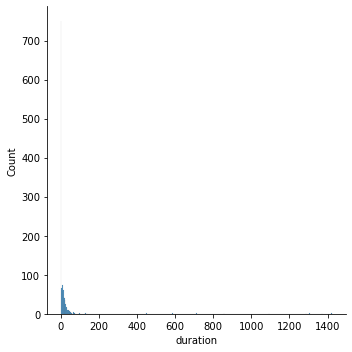

In [19]:

sns.displot(df.duration)

In [22]:
((df.duration>=1) & (df.duration<=60)).mean()

0.502498215560314

In [60]:
categorical=['PULocationID','DOLocationID']

In [61]:
numerical=['trip_distance']

In [62]:
df[categorical].dtypes

Series([], dtype: object)

In [63]:
df[categorical]=df[categorical].astype(str)

In [64]:
from sklearn.feature_extraction import DictVectorizer

In [65]:
train_dicts =df[categorical+numerical].to_dict(orient='records')

In [66]:
dv=DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [68]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [69]:
lr=LinearRegression()

In [70]:
target='duration'
y_train=df[target].values

In [71]:
lr.fit(X_train,y_train)

LinearRegression()

In [72]:
y_pred =lr.predict(X_train)

/home/azureuser/ENTER/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/azureuser/ENTER/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


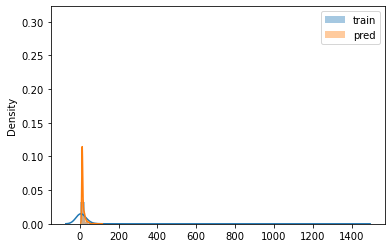

In [73]:
sns.distplot(y_train,label='train')
sns.distplot(y_pred,label='pred')
plt.legend()


In [74]:
from sklearn.metrics import mean_squared_error

In [75]:
mean_squared_error(y_train,y_pred,squared=False)

100.90757126566875